# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [1]:
import seaborn as sns   #Import thư viện seaborn
%matplotlib inline     

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')   #Tải dữ liệu từ bộ dữ liệu tips

In [3]:
tips.head()   #Lấy dữ liệu 5 hàng đầu tiên

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.
(Disstplot cho thấy sự phân bố của một tập hợp các quan sát đơn biến.)

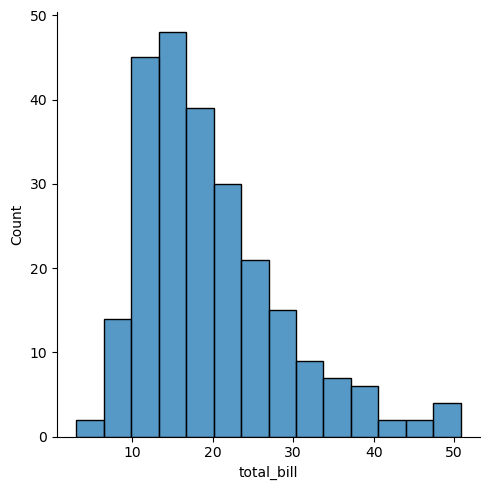

In [4]:
sns.displot(tips['total_bill'])   
#displot() được sử dụng để tạo biểu đồ phân phối
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

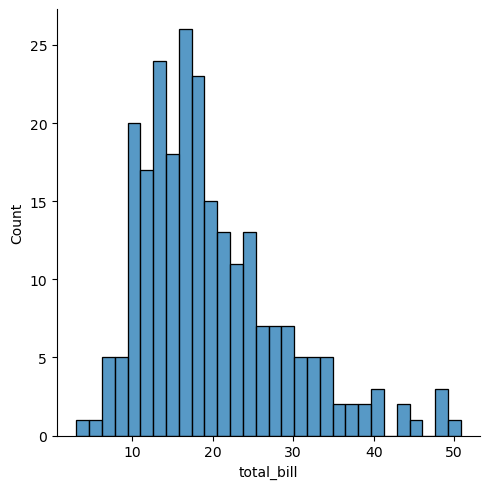

In [5]:
sns.displot(tips['total_bill'],kde=False,bins=30)
#kde=false tham số này được sử dụng để tắt hiển thị đường cong xác suất mật độ 
#bins=30 xác định số lượng bin(ngăn) trong biểu đồ phân phối

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

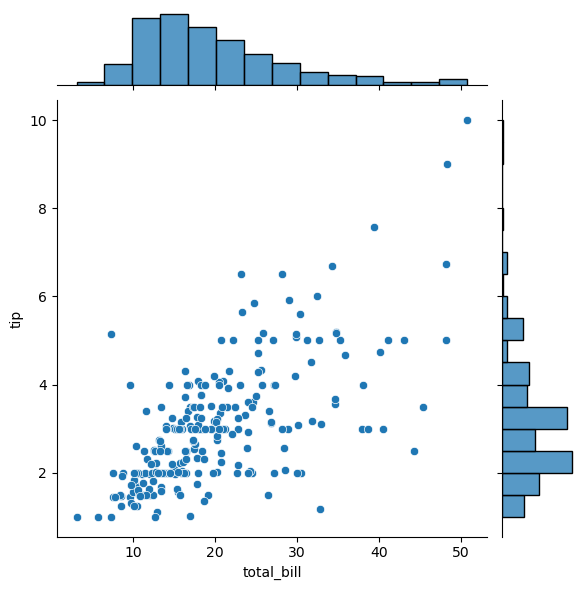

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
#joinplot() là biểu đồ liên hợp, hàm này nhận vào hai cột x, y
#kind là chỉ định kiểu biều đồ liên hợp

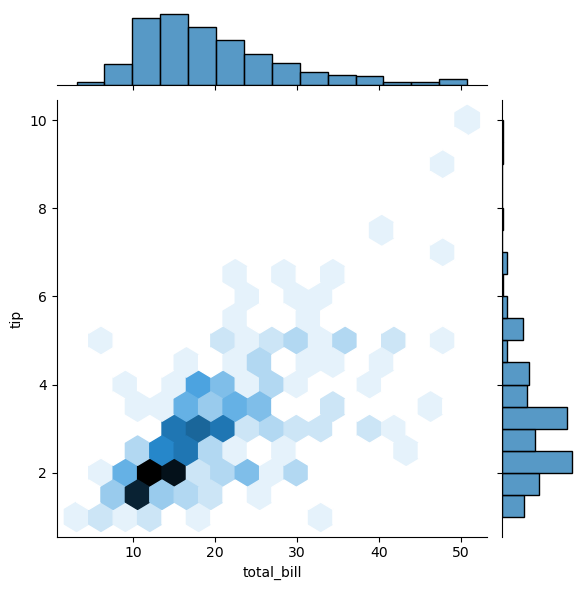

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

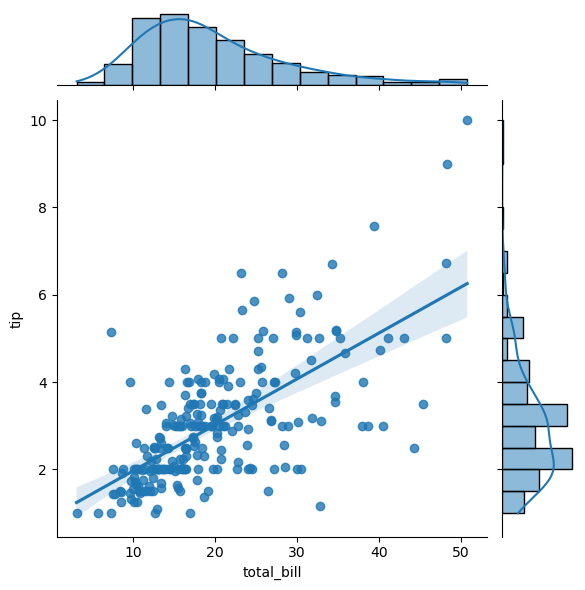

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 
pairplot sẽ vẽ các mối quan hệ theo cặp trên toàn bộ khung dữ liệu (đối với các cột số) và hỗ trợ đối số màu sắc (đối với các cột phân loại).

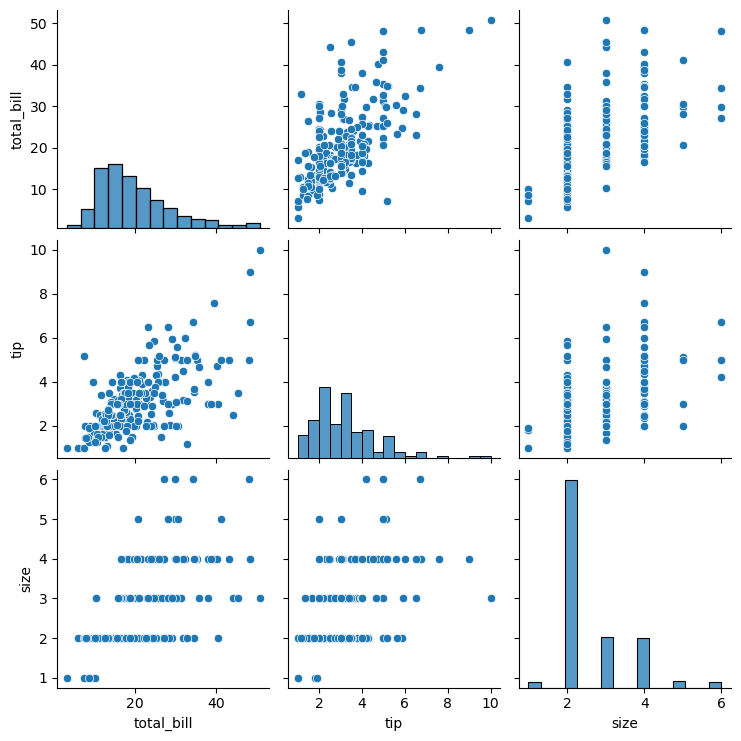

In [9]:
sns.pairplot(tips)
#. Hàm này nhận vào một bộ dữ liệu và tạo ra một lưới các biểu đồ tương quan giữa tất cả các cột trong bộ dữ liệu đó.

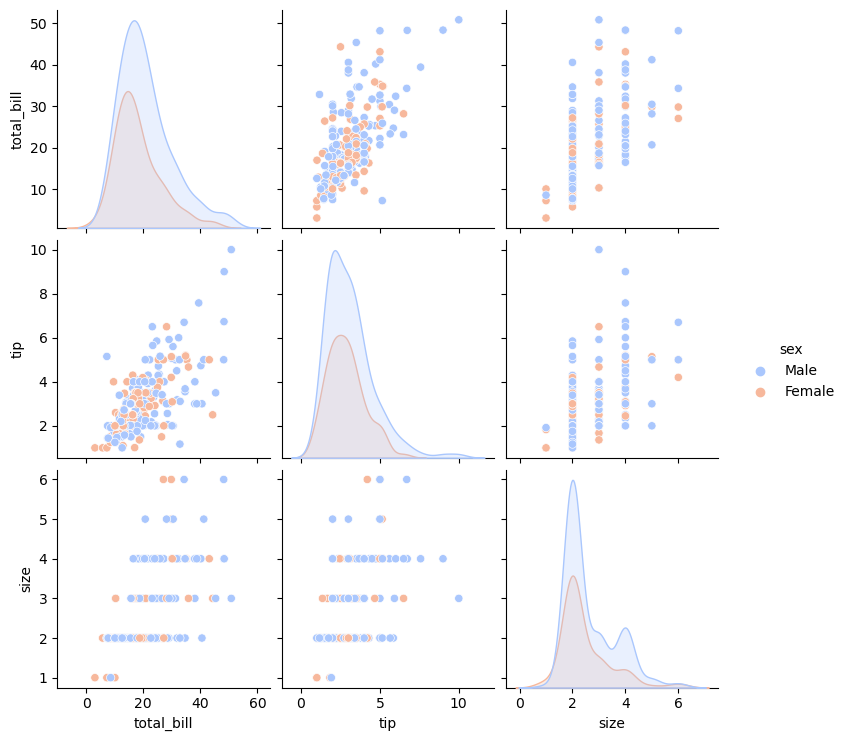

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#hue='sex' cho biết rằng cột "sex" trong DataFrame tips sẽ được sử dụng để phân loại và tô màu các điểm trên biểu đồ pair plot dựa trên giới tính (nam/nữ).
#palette='coolwarm' cho biết rằng sẽ sử dụng một bảng màu coolwarm để tô màu các điểm trên biểu đồ.

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:
rugplots là một khái niệm rất đơn giản, chúng chỉ vẽ một dấu gạch ngang cho mọi điểm trên một phân phối đơn biến. 

<AxesSubplot:xlabel='total_bill'>

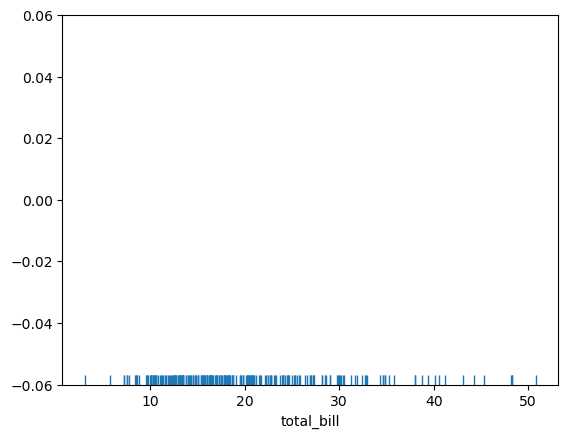

In [11]:
sns.rugplot(tips['total_bill'])
#Trong trường hợp này, rug plot sẽ hiển thị các rug trên trục x, mỗi rug tương ứng với một giá trị trong cột "total_bill". Điều này cho phép chúng ta xem xét phân bố của các giá trị tổng hóa đơn trên trục x.

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

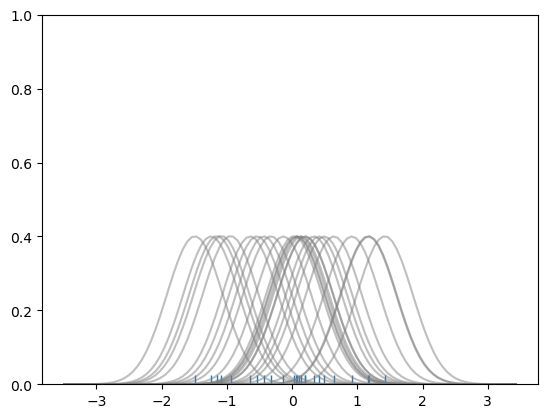

In [12]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Tạo ra một mảng dataset gồm 25 phần tử ngẫu nhiên được rút từ phân phối chuẩn (normal distribution).
dataset = np.random.randn(25) 


#Tạo ra một rug plot cho dữ liệu trong dataset
sns.rugplot(dataset);

#Thiết lập giá trị tối thiểu và tối đa trên trục x của biểu đồ.
x_min = dataset.min() - 2
x_max = dataset.max() + 2

#Tạo ra một mảng x_axis chứa 100 điểm cách đều nhau trên trục x, từ x_min đến x_max.
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:

url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
#Tính toán độ rộng của kernel (bandwidth) dựa trên độ lệch chuẩn của dataset. Đây là một thông số quan trọng trong phân phối kernel.
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Tạo ra một danh sách trống để lưu trữ các kernel function.
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Tạo ra một kernel function cho mỗi điểm dữ liệu trong dataset sử dụng phân phối chuẩn (stats.norm) với giá trị trung bình là data_point và độ rộng (bandwidth).
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)   #Thêm kernel function này vào danh sách kernel_list.
    
    #Tính toán và điều chỉnh tỉ lệ của kernel function để phù hợp với việc vẽ biểu đồ.
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5) #Vẽ kernel function lên biểu đồ với màu xám và độ trong suốt.

plt.ylim(0,1) #Thiết lập giới hạn trục y của biểu đồ từ 0 đến 1.

Text(0.5, 0.98, 'Sum of the Basis Functions')

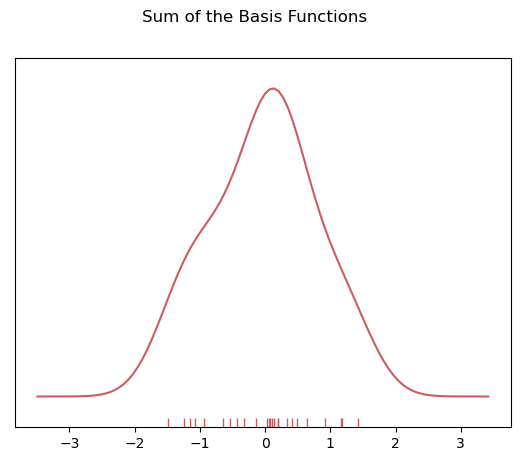

In [13]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)    #tính tổng của các hàm cơ sở trong kernel_list theo trục 0. 

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')   #tạo một đồ thị với trục x là x_axis và giá trị y là sum_of_kde

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')   # thêm đồ thị rugplot cho tập dữ liệu dataset

# Get rid of y-tick marks
plt.yticks([])   #loại bỏ các đánh dấu trục y trên đồ thị.

# Set title
plt.suptitle("Sum of the Basis Functions")   #đặt tiêu đề cho đồ thị

So with our tips dataset:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

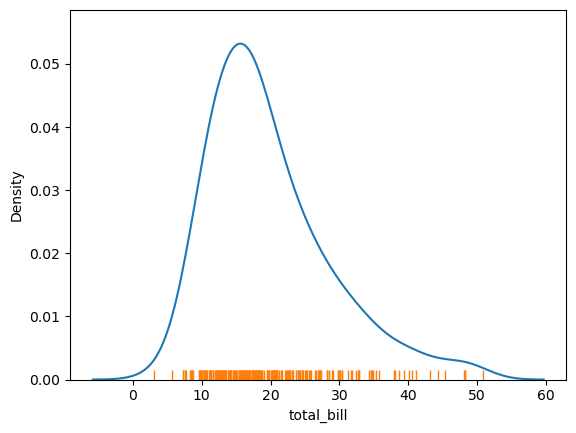

In [14]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
#Hàm sns.kdeplot(tips['total_bill']) được sử dụng để vẽ đồ thị KDE cho dữ liệu trong cột 'total_bill' của bộ dữ liệu 'tips'.
#Đồ thị KDE biểu diễn ước lượng mật độ xác suất của biến liên tục (trong trường hợp này là 'total_bill'). 
#Nó giúp hiểu được phân phối xác suất của dữ liệu và mức độ tập trung của nó.
#Đồ thị KDE là một dạng mượt hơn của đồ thị histogram và thường được sử dụng để thể hiện hình dạng xác suất của dữ liệu.


#Hàm sns.rugplot(tips['total_bill']) được sử dụng để vẽ đồ thị rug cho dữ liệu trong cột 'total_bill' của bộ dữ liệu 'tips'.
#Đồ thị rug thường được sử dụng như một bổ sung cho đồ thị KDE hoặc histogram.
#Nó hiển thị các điểm dữ liệu trên trục x (trục đứng) và tạo ra các vạch nhỏ (vạch lông) tương ứng với mỗi điểm dữ liệu. 
#Đồ thị rug cho thấy vị trí của các điểm dữ liệu và cung cấp một cái nhìn tổng quan về phân bố của chúng.

<AxesSubplot:xlabel='tip', ylabel='Density'>

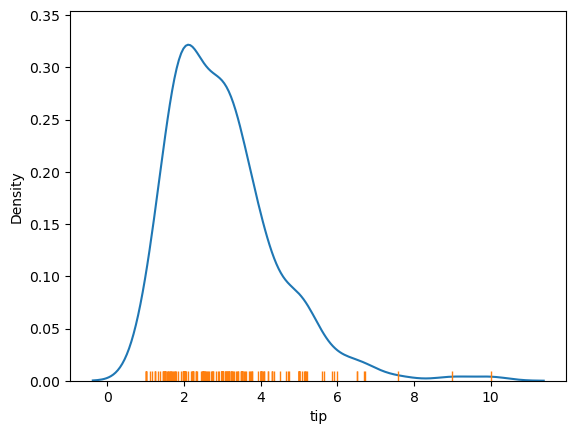

In [15]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Great Job!